In [303]:
# jupyter notebook stop
#
#Default 8888

import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [304]:
#This notebook will explore and visualise the mining sector of South Africa 2000 - 102023
#More visualisations will come soon!

In [305]:
#Read excel file
#Downloaded from  https://www.statssa.gov.za/timeseriesdata/Excel/P0041%20Civil%20cases%20for%20debt%20(202310).zip
df = pd.read_excel('Excel table from 2003.xlsx', sheet_name='Excel table from 2003')

In [306]:
df

,H01,H02,H03,H04,H05,H06,H16,H17,H18,H25,...,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023,MO092023,MO102023
0,P2041,Mining: Production and sales,FMP20000,Physical volume of mining production,"Total, gold included",NaN,Actual indices,Index,2019=100,Monthly,...,83.0,75.5,96.2,88.5,95.8,100.3,94.4,100.0,95.4,96.0
1,P2041,Mining: Production and sales,FMP20001,Physical volume of mining production,"Total, gold excluded",NaN,Actual indices,Index,2019=100,Monthly,...,83.6,74.3,96.3,89.0,95.9,100.8,94.4,100.5,95.6,95.2
2,P2041,Mining: Production and sales,FMP21000,Physical volume of mining production,Coal,NaN,Actual indices,Index,2019=100,Monthly,...,83.3,75.1,93.8,86.3,87.1,92.7,94.1,94.0,95.8,94.9
3,P2041,Mining: Production and sales,FMP23010,Physical volume of mining production,Iron ore,NaN,Actual indices,Index,2019=100,Monthly,...,86.6,68.8,92.9,87.8,88.3,90.4,105.7,106.8,81.7,74.6
4,P2041,Mining: Production and sales,FMP23020,Physical volume of mining production,Chromium,NaN,Actual indices,Index,2019=100,Monthly,...,91.5,98.2,109.7,103.7,110.7,116.2,114.0,122.3,120.8,120.1
5,P2041,Mining: Production and sales,FMP23021,Physical volume of mining production,Copper,NaN,Actual indices,Index,2019=100,Monthly,...,69.9,47.3,102.7,102.1,94.8,81.8,103.1,114.3,106.5,104.9
6,P2041,Mining: Production and sales,FMP23022,Physical volume of mining production,Manganese ore,NaN,Actual indices,Index,2019=100,Monthly,...,109.8,100.6,123.3,112.0,119.1,126.4,110.6,118.5,110.5,117.7
7,P2041,Mining: Production and sales,FMP23023,Physical volume of mining production,PGMs,NaN,Actual indices,Index,2019=100,Monthly,...,73.2,66.6,94.0,85.7,103.1,109.9,83.1,100.0,100.1,99.0
8,P2041,Mining: Production and sales,FMP23029,Physical volume of mining production,Nickel,NaN,Actual indices,Index,2019=100,Monthly,...,49.1,38.9,62.6,73.5,75.1,73.9,60.1,70.6,76.9,79.9
9,P2041,Mining: Production and sales,FMP23999,Physical volume of mining production,Other metallic minerals,NaN,Actual indices,Index,2019=100,Monthly,...,92.1,83.2,104.1,107.6,108.2,111.7,113.8,100.2,91.7,95.5


In [307]:
df["MO012003"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 42 entries, 0 to 41
Series name: MO012003
Non-Null Count  Dtype  
--------------  -----  
42 non-null     float64
dtypes: float64(1)
memory usage: 468.0 bytes


In [308]:
#Lets get only the actual value
# Not Seasonally adjusted indices or Actual indices

def cleaning(data):
    
    #Row with Actual value only
    #Drop the rest for this project

    # Subset data: Lets look Actual Value under head H16
    mask_actual_value = data["H16"].str.contains("Actual value")
    mask_no_total = data["H05"].str.contains("Total")
  
    data = data[mask_actual_value & ~mask_no_total]

    #I wont be needing these columns
    data.drop(columns=["H01", "H03", "H06", "H16", "H17", "H18"], inplace=True) #Lets keep H25 to show its monthly

    data.set_index("H05", inplace = True)
    data.index.names = ['Minerals']
    #data.reset_index(inplace=True)     #Reseting index values
    
    return data

In [309]:
cleanData = cleaning(df)
cleanData

C:\Users\ipfan\AppData\Local\Temp\ipykernel_4024\3997146511.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=["H01", "H03", "H06", "H16", "H17", "H18"], inplace=True) #Lets keep H25 to show its monthly


,H02,H04,H25,MO012003,MO022003,MO032003,MO042003,MO052003,MO062003,MO072003,...,MO012023,MO022023,MO032023,MO042023,MO052023,MO062023,MO072023,MO082023,MO092023,MO102023
Minerals,,,,,,,,,,,,,,,,,,,,,
Coal,Mining: Production and sales,"Mineral sales according to mining divisions, m...",Monthly,2054.0,2214.1,2202.9,2244.8,2316.1,2040.3,2426.6,...,16644.7,15139.9,16866.9,16753.3,15502.2,16070.4,13468.0,16644.1,16228.9,16841.0
Iron ore,Mining: Production and sales,"Mineral sales according to mining divisions, m...",Monthly,308.1,397.1,383.4,316.5,335.2,426.7,351.9,...,8270.8,7787.0,9815.0,8476.3,8155.2,7672.5,8091.6,8298.5,7035.2,7146.8
Chromium,Mining: Production and sales,"Mineral sales according to mining divisions, m...",Monthly,102.2,82.8,88.2,92.9,106.5,92.3,95.4,...,3819.8,4182.2,4837.9,4733.9,4446.2,5050.3,4852.4,5027.1,4799.1,5078.9
Copper,Mining: Production and sales,"Mineral sales according to mining divisions, m...",Monthly,153.8,172.2,134.5,119.9,104.9,137.6,134.6,...,552.3,216.2,486.6,481.4,629.0,496.0,508.8,614.0,657.0,489.6
Manganese ore,Mining: Production and sales,"Mineral sales according to mining divisions, m...",Monthly,174.3,81.2,125.0,134.7,107.9,141.1,68.5,...,3342.7,4070.7,4875.9,3458.9,4887.9,4415.7,3341.4,3725.5,3651.8,3732.7
PGMs,Mining: Production and sales,"Mineral sales according to mining divisions, m...",Monthly,2882.2,2629.3,2180.3,2189.8,1766.6,2191.2,2635.9,...,16062.1,16067.0,19217.1,17084.8,22174.7,16230.3,11726.9,13567.5,17099.7,15668.2
Nickel,Mining: Production and sales,"Mineral sales according to mining divisions, m...",Monthly,217.7,204.7,171.9,210.9,169.4,174.6,276.9,...,831.4,804.9,789.2,913.5,1004.7,971.7,862.2,834.7,1020.6,861.8
Other metallic minerals,Mining: Production and sales,"Mineral sales according to mining divisions, m...",Monthly,215.3,209.4,216.3,283.6,250.4,296.6,250.4,...,2700.6,1544.9,2535.0,2032.5,2272.1,2077.5,1877.3,1756.0,1661.4,1463.7
Gold,Mining: Production and sales,"Mineral sales according to mining divisions, m...",Monthly,3124.7,2783.9,2688.5,2478.8,2626.8,2986.4,2790.6,...,8619.0,4776.3,6834.6,3372.4,15778.6,10031.8,9420.8,11653.0,7633.6,15140.1


In [310]:
#Lets see if we have any NAN
print(cleanData.isna().sum())

H02         0
H04         0
H25         0
MO012003    0
MO022003    0
           ..
MO062023    0
MO072023    0
MO082023    0
MO092023    0
MO102023    0
Length: 253, dtype: int64


In [311]:
cleanData = cleanData.T
cleanData.drop(["H02", "H04", "H25"], axis = 0, inplace = True)


In [312]:
cleanData

Minerals,Coal,Iron ore,Chromium,Copper,Manganese ore,PGMs,Nickel,Other metallic minerals,Gold,Building materials,Building materials,Building materials,Building materials,Other non-metallic minerals
MO012003,2054.0,308.1,102.2,153.8,174.3,2882.2,217.7,215.3,3124.7,71.5,99.6,265.9,94.8,370.6
MO022003,2214.1,397.1,82.8,172.2,81.2,2629.3,204.7,209.4,2783.9,50.5,96.2,260.5,113.7,1201.3
MO032003,2202.9,383.4,88.2,134.5,125.0,2180.3,171.9,216.3,2688.5,59.3,98.3,281.0,123.5,1357.1
MO042003,2244.8,316.5,92.9,119.9,134.7,2189.8,210.9,283.6,2478.8,41.4,100.2,259.3,117.7,962.8
MO052003,2316.1,335.2,106.5,104.9,107.9,1766.6,169.4,250.4,2626.8,55.9,102.4,287.5,129.2,1032.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MO062023,16070.4,7672.5,5050.3,496.0,4415.7,16230.3,971.7,2077.5,10031.8,66.7,403.6,1132.3,662.0,2232.0
MO072023,13468.0,8091.6,4852.4,508.8,3341.4,11726.9,862.2,1877.3,9420.8,50.8,363.2,1096.8,682.8,2018.9
MO082023,16644.1,8298.5,5027.1,614.0,3725.5,13567.5,834.7,1756.0,11653.0,56.9,399.8,1235.7,779.0,3809.1
MO092023,16228.9,7035.2,4799.1,657.0,3651.8,17099.7,1020.6,1661.4,7633.6,44.0,380.0,1096.8,672.9,2074.3


In [313]:
#Drop building materials
cleanData.drop("Building materials", axis = 1, inplace = True)
#Extract only digits for moth and year

cleanData

Minerals,Coal,Iron ore,Chromium,Copper,Manganese ore,PGMs,Nickel,Other metallic minerals,Gold,Other non-metallic minerals
MO012003,2054.0,308.1,102.2,153.8,174.3,2882.2,217.7,215.3,3124.7,370.6
MO022003,2214.1,397.1,82.8,172.2,81.2,2629.3,204.7,209.4,2783.9,1201.3
MO032003,2202.9,383.4,88.2,134.5,125.0,2180.3,171.9,216.3,2688.5,1357.1
MO042003,2244.8,316.5,92.9,119.9,134.7,2189.8,210.9,283.6,2478.8,962.8
MO052003,2316.1,335.2,106.5,104.9,107.9,1766.6,169.4,250.4,2626.8,1032.8
...,...,...,...,...,...,...,...,...,...,...
MO062023,16070.4,7672.5,5050.3,496.0,4415.7,16230.3,971.7,2077.5,10031.8,2232.0
MO072023,13468.0,8091.6,4852.4,508.8,3341.4,11726.9,862.2,1877.3,9420.8,2018.9
MO082023,16644.1,8298.5,5027.1,614.0,3725.5,13567.5,834.7,1756.0,11653.0,3809.1
MO092023,16228.9,7035.2,4799.1,657.0,3651.8,17099.7,1020.6,1661.4,7633.6,2074.3


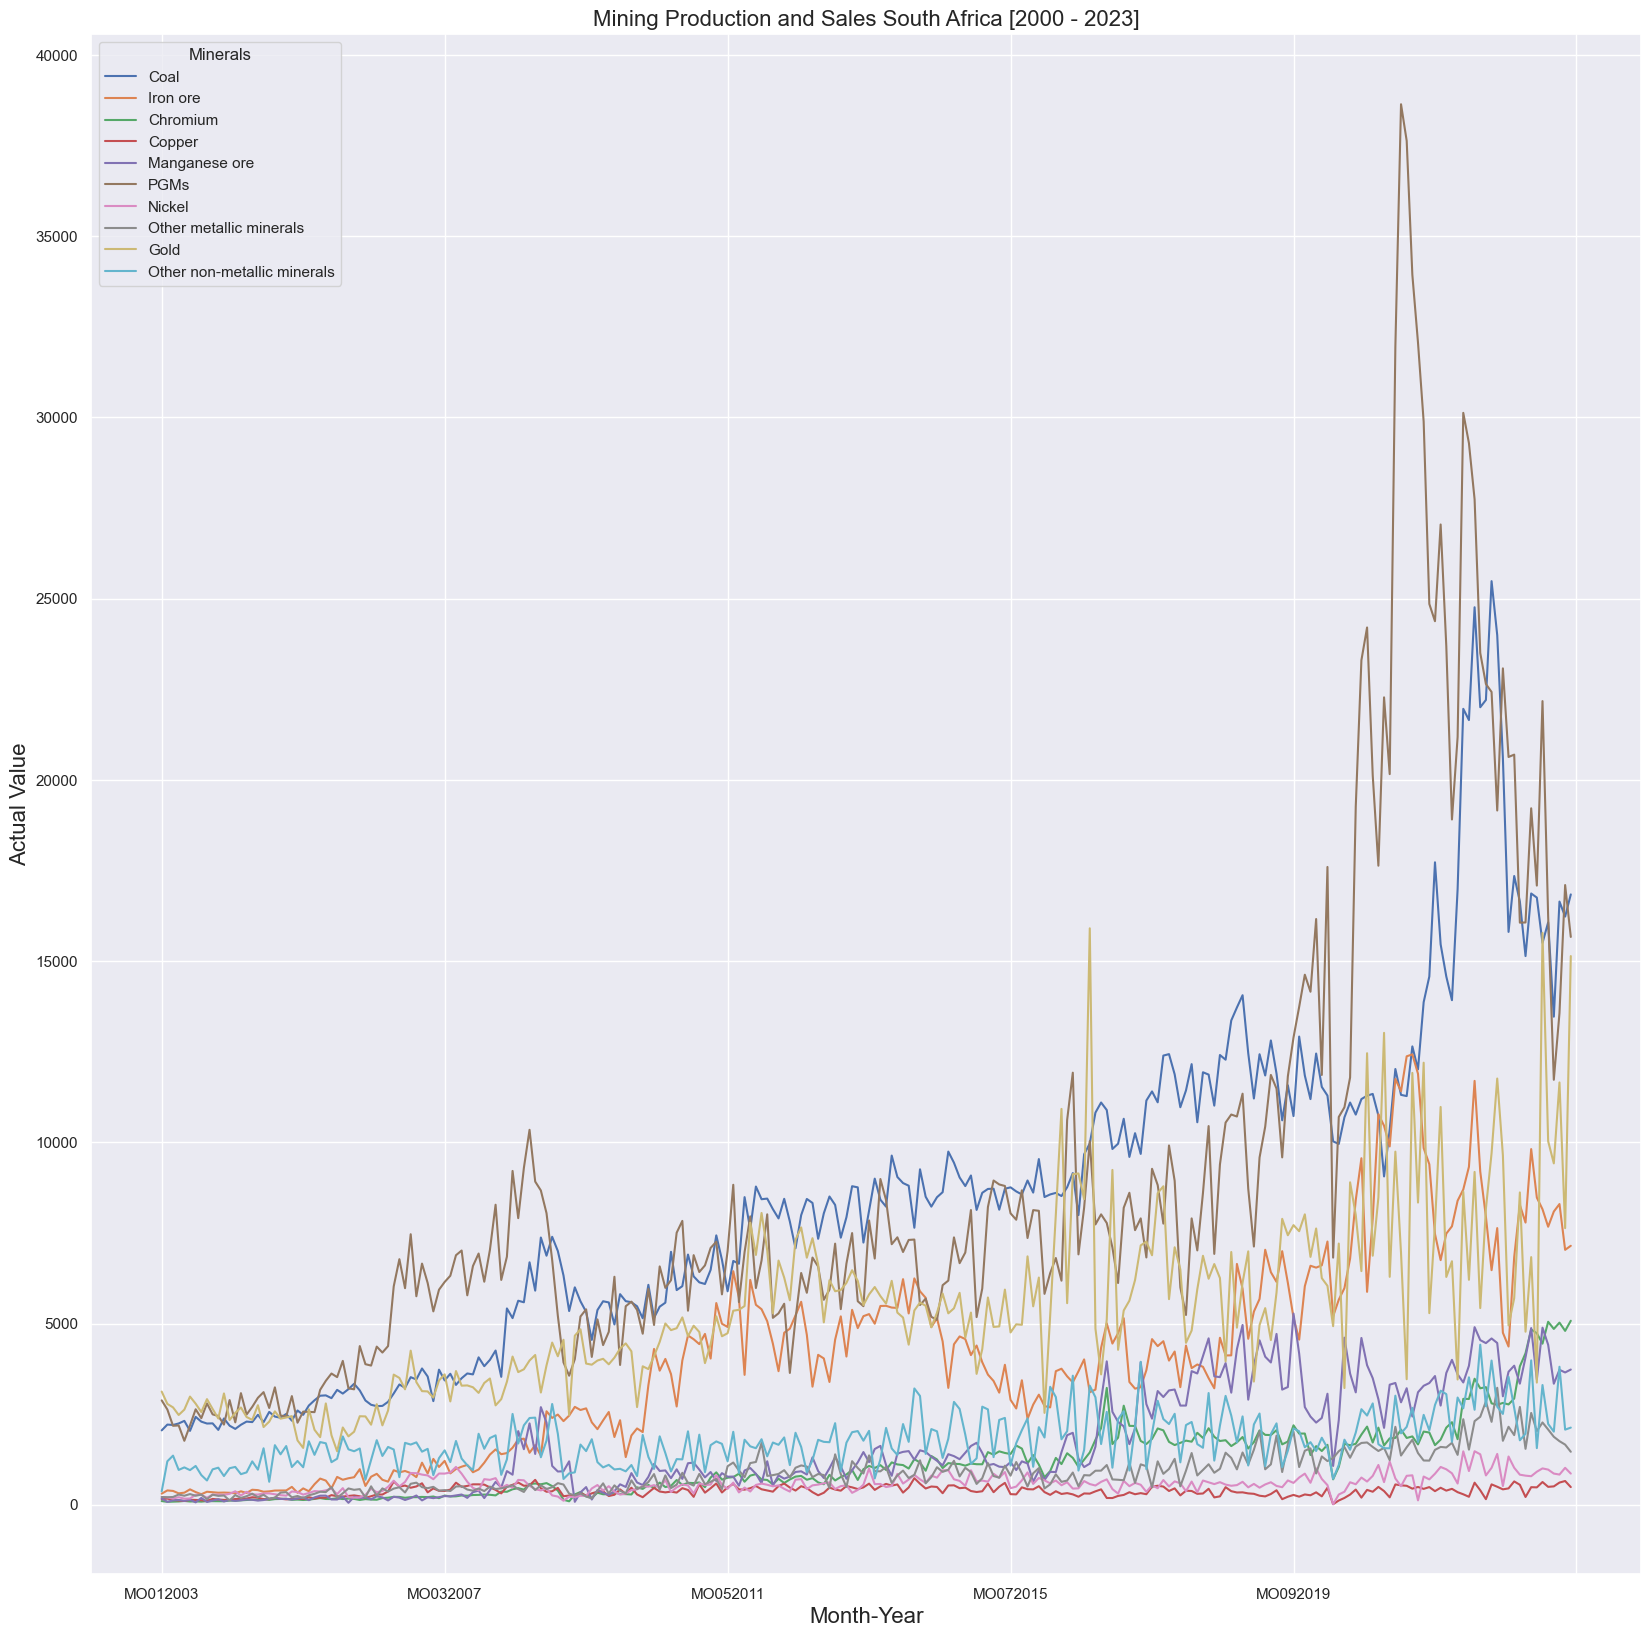

In [314]:
cleanData.plot(
        kind="line", figsize=(20, 20))
# display plot
plt.title("Mining Production and Sales South Africa [2000 - 2023]", fontsize = 16)
plt.ylabel("Actual Value", fontsize = 16)
plt.xlabel("Month-Year", fontsize = 16)
plt.show()

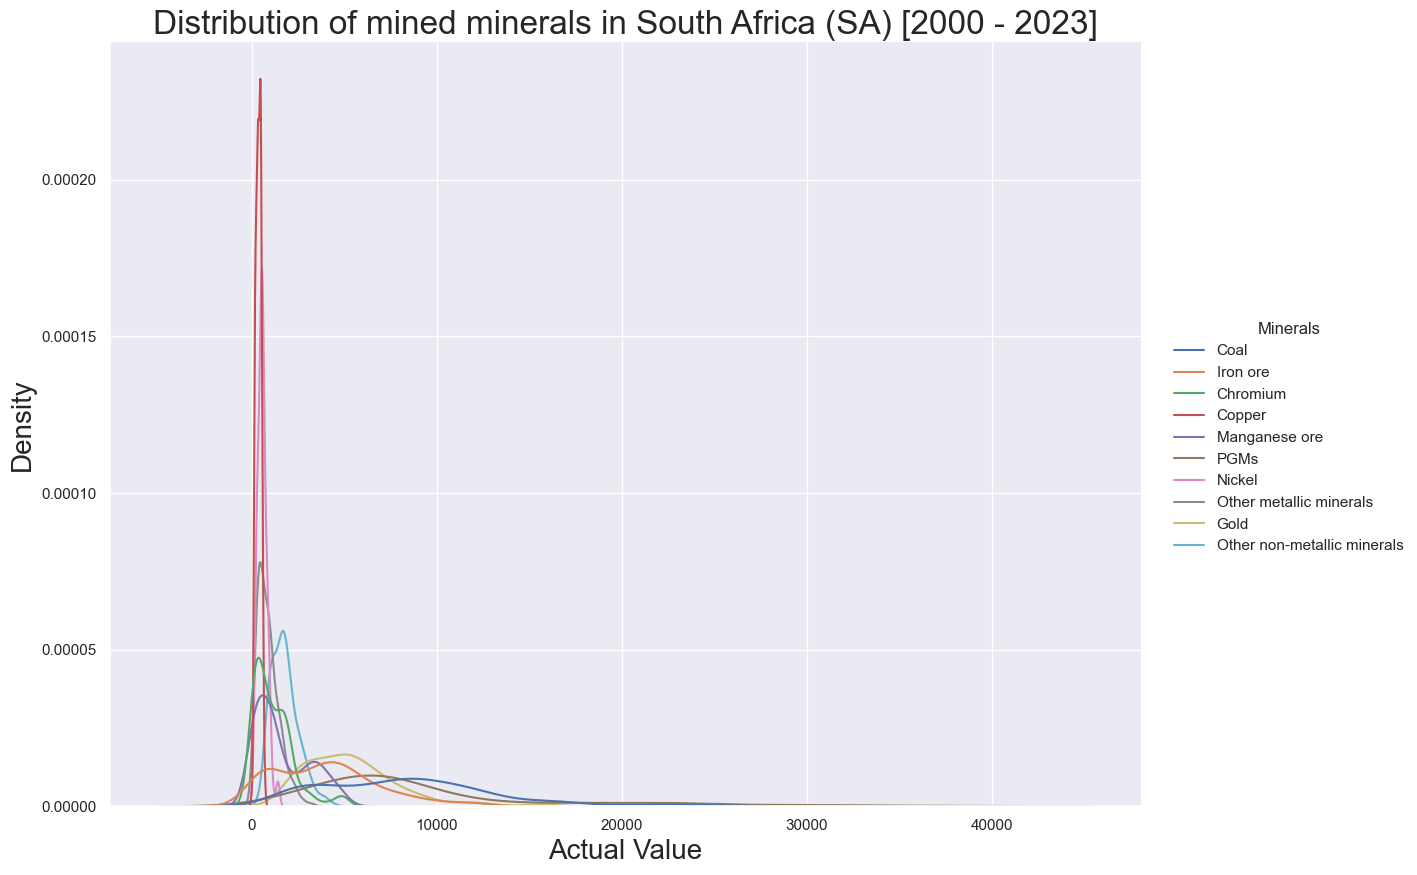

In [315]:
sns.displot(cleanData, kind="kde", height=8.27, aspect=11.7/8.27)
plt.title("Distribution of mined minerals in South Africa (SA) [2000 - 2023]", fontsize = 24)
plt.ylabel("Density", fontsize = 20)
plt.xlabel("Actual Value", fontsize = 20)
plt.show()


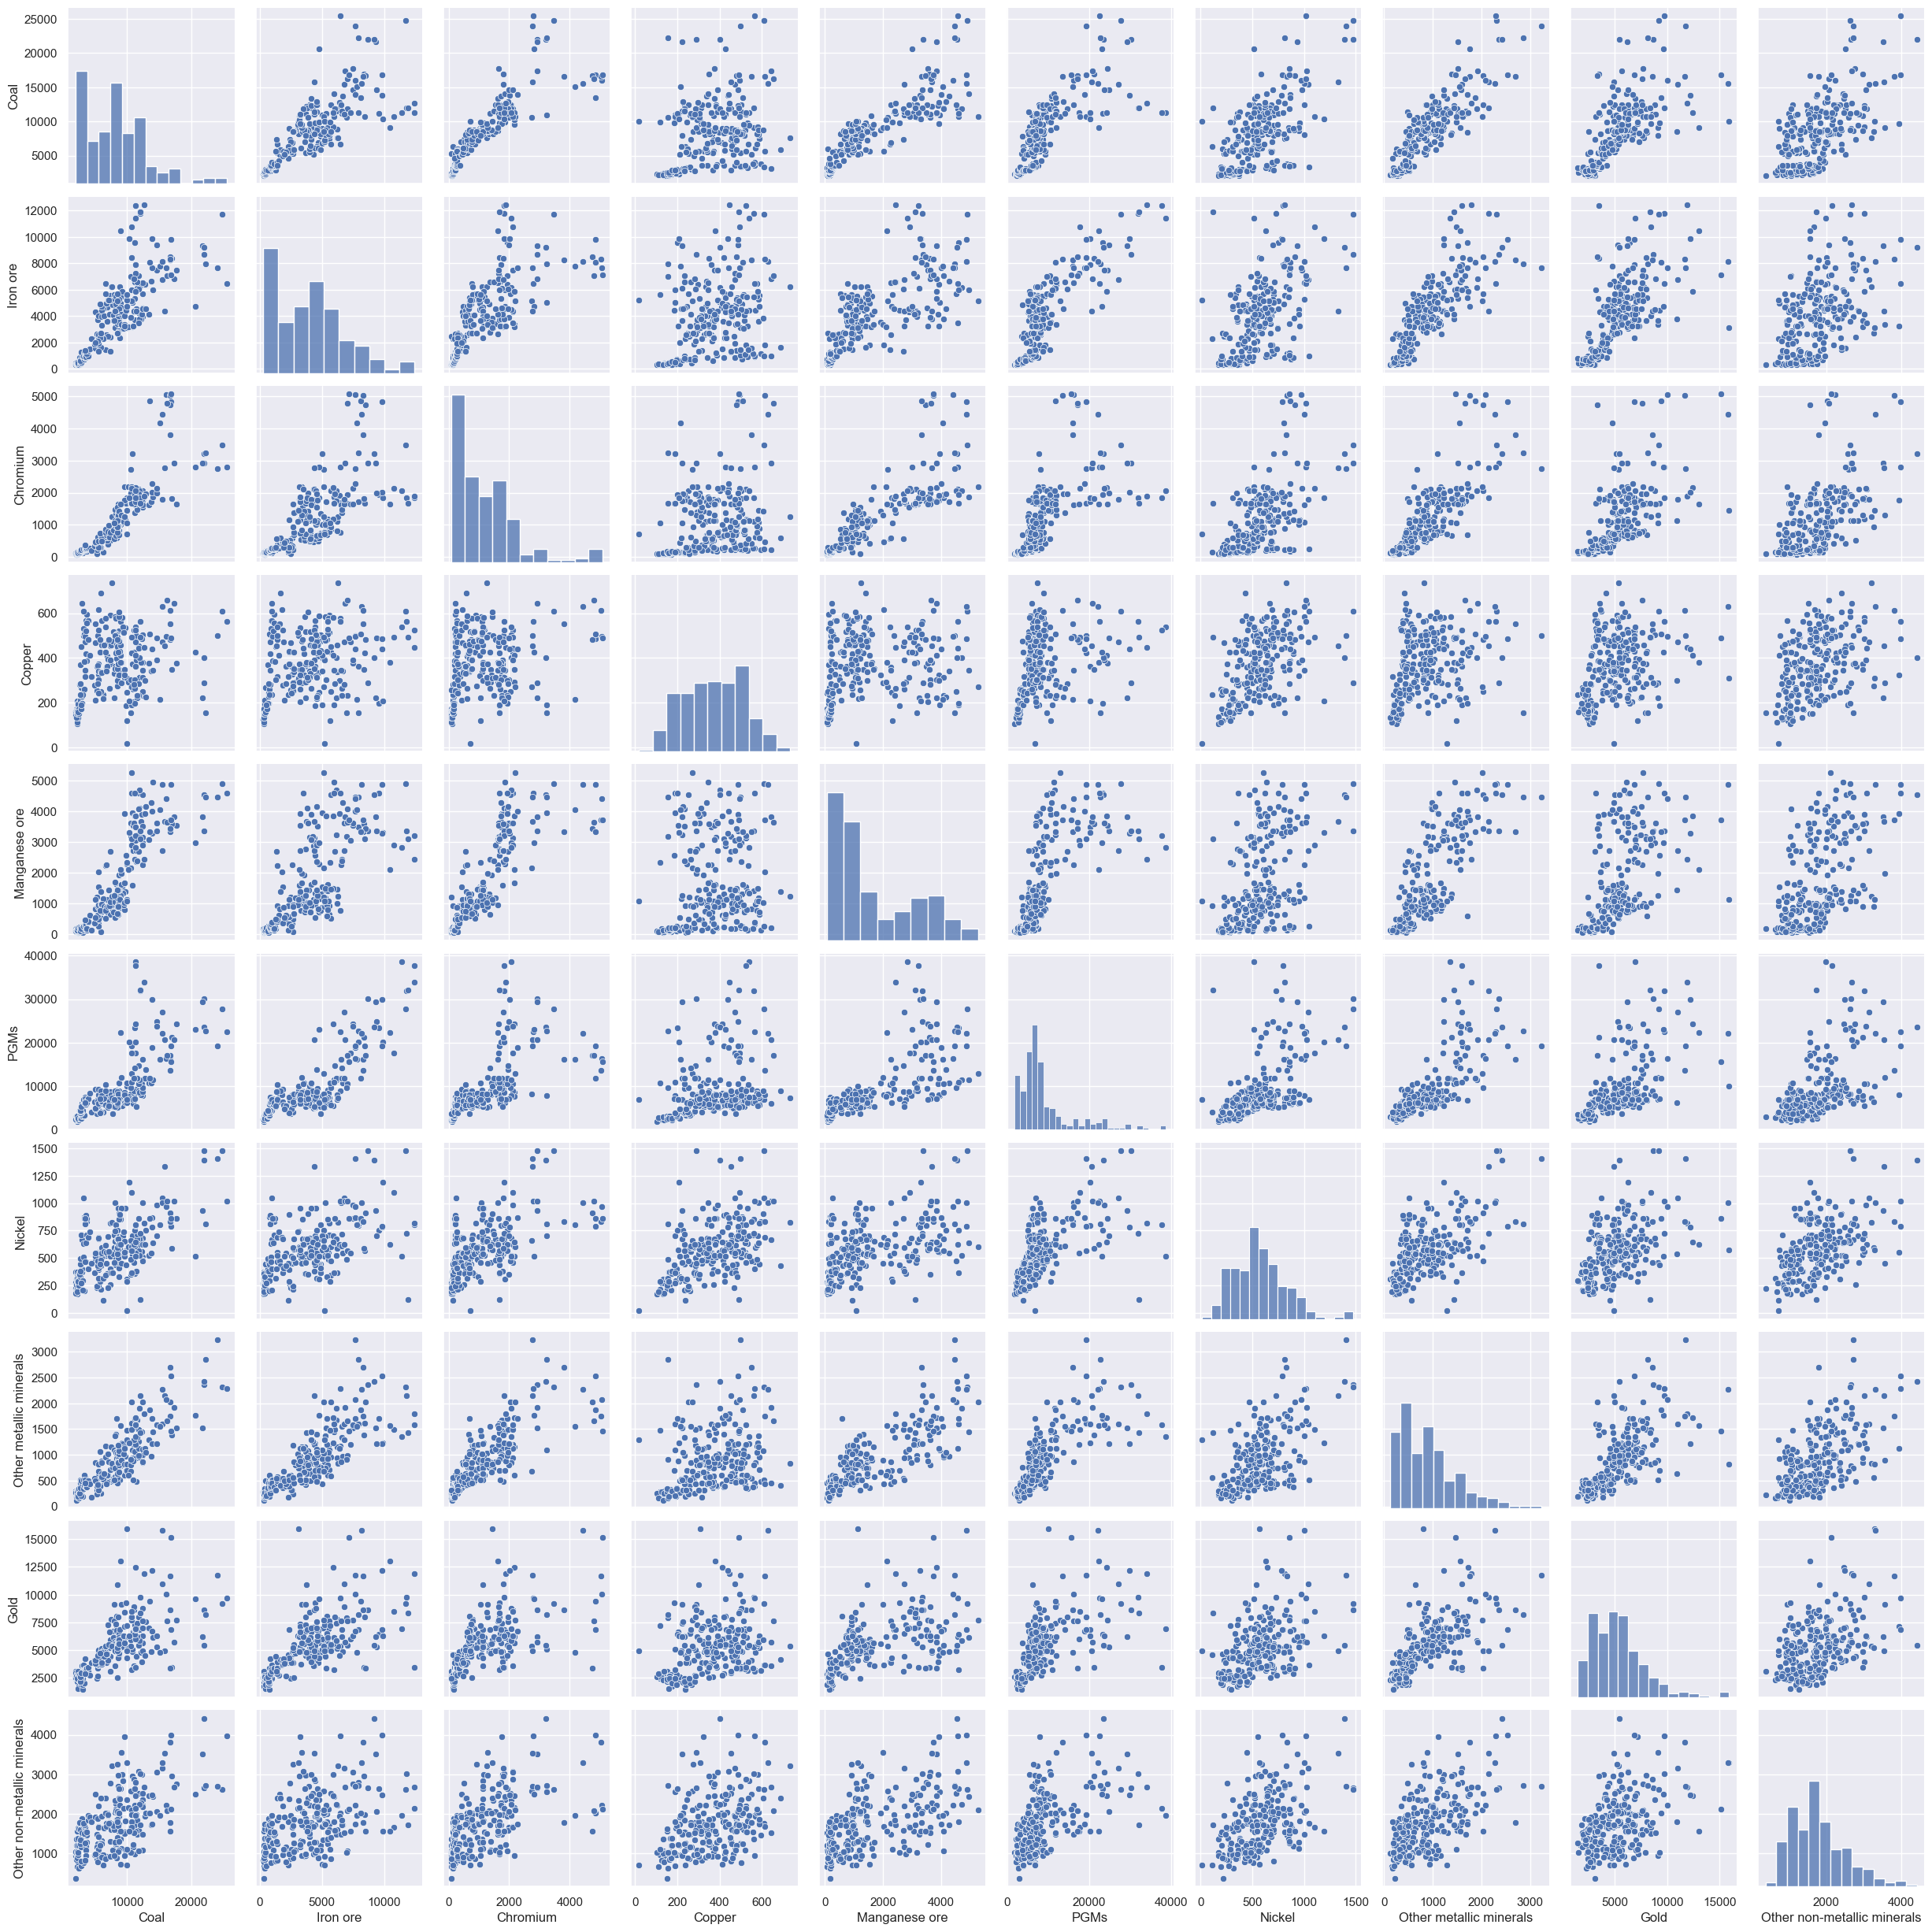

In [316]:
sns.pairplot(cleanData)